# Analysis of Brazilian Higher Education Data
### (Part 2 - Data Cleaning)

<b>Date:</b> 01/09/2020

<b>Author:</b> Cardoso, Thiago (thiago.guimaraesdf10@gmail.com)

<b>Project Description:</b> This study seeks to organize and develop a basic analysis of higher education data available for Brazilians public and private institutions. This is my first data science/exploration project using Python, therefore the analysis and codes showcased are far from being a repository of best practice. Any suggestions to improve this project are appreciated.

For better organization and comprehension, this study is divided into 3 parts:

- <b>Part 1 - Data Extraction</b>: Description of datasets used in the project, its sources and the path to download it. This notebook will be updated if future analysis demands new datasets.
- <b>Part 2 - Data Cleaning</b>: Code used to clean data and standardize column names. The main goal is to have comparable panel data, with annual information for courses, students, and institutions in the last decade.
- <b>Part 3 - Data Analysis</b>: The analysis is subdivided into 6 sections. The first section analysis the historical panorama of higher education growth in Brazil, especially in the last 10 years.

<b>This notebook is related to Part 2</b>

<b>Important issues:</b>

- English is not my mother language. Sorry for the mistakes;
- Many (maybe most) code lines lack consistency, performance and/or efficiency. Did my best to conciliate productivity and code quality. Any suggestions to improve code lines are welcome;
- The Analysis and Data Cleaning only scratch the surface of the extremely rich data used in this study.  Any author seeking to further this study fell free to contact me. I can also help with any translation issue and provide information for additional sources of data in Brazil.

## Library Import

In [245]:
import os
import shutil
import time
from os import path

import webbrowser
import xlsxwriter
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium

%matplotlib inline

In [246]:
# Defining directory 

define_dir = "C:/Users/Thiago/Documents/DataScience/Projeto_A"

os.chdir(define_dir)

## 1. Brazilian Higher Education Census - 2009 to 2018

This data cleaning is broken into 2 steps. First, we work in courses and institutions datasets. These datasets are saved in a panel with data from 2009 to 2018. Second, we work with students' datasets. Because of its size, each dataset are saved in separate files


In [247]:
# Read courses and instituions annual dataframes

for y in range(2009,2019):
    
    globals()["cursos_" + str(y)] = pd.read_csv("data/csv_bases/CENSO_SUPERIOR/DM_CURSO_" + str(y) + ".csv", sep ='|', encoding='latin-1')
    globals()["ies_" + str(y)] = pd.read_csv("data/csv_bases/CENSO_SUPERIOR/DM_IES_" + str(y) + ".csv", sep ='|', encoding='latin-1')

### 1.1 Courses dataframes

<b>Standardization of courses columns across years</b>

In [248]:
    
# 2009

cursos_2009["QT_VAGAS"] = cursos_2009.fillna(0)["QT_VAGAS_INTEGRAL"] + cursos_2009.fillna(0)["QT_VAGAS_MATUTINO"] + cursos_2009.fillna(0)["QT_VAGAS_NOTURNO"] + cursos_2009.fillna(0)["QT_VAGAS_VESPERTINO"]  

cursos_2009["NU_ANO"] = 2009

cursos_2009 = cursos_2009[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_OCDE_AREA_GERAL","NO_AREA_GERAL",
                          "CO_OCDE_AREA_DETALHADA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO"]]


# 2010

cursos_2010["QT_VAGAS"] = cursos_2010.fillna(0)["QT_VAGAS_ANUAL_EAD"] + cursos_2010.fillna(0)["QT_VAGAS_INTEGRAL_PRES"] + cursos_2010.fillna(0)["QT_VAGAS_MATUTINO_PRES"] + cursos_2010.fillna(0)["QT_VAGAS_NOTURNO_PRES"] + cursos_2010.fillna(0)["QT_VAGAS_VESPERTINO_PRES"]

cursos_2010["QT_INSCRITOS_ANO"] = cursos_2010.fillna(0)["QT_INSCRITOS_ANO_EAD"] + cursos_2010.fillna(0)["QT_INSCRITOS_MATUTINO_PRES"] + cursos_2010.fillna(0)["QT_INSCRITOS_VESPERTINO_PRES"] + cursos_2010.fillna(0)["QT_INSCRITOS_NOTURNO_PRES"] + cursos_2010.fillna(0)["QT_INSCRITOS_INTEGRAL_PRES"]

cursos_2010["NU_ANO"] = 2010

cursos_2010 = cursos_2010[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_OCDE_AREA_GERAL",
                          "CO_OCDE_AREA_DETALHADA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO"]]


# 2011

cursos_2011["QT_VAGAS"] = cursos_2011.fillna(0)["QT_VAGAS_ANUAL_EAD"] + cursos_2011.fillna(0)["QT_VAGAS_INTEGRAL_PRES"] + cursos_2011.fillna(0)["QT_VAGAS_MATUTINO_PRES"] + cursos_2011.fillna(0)["QT_VAGAS_NOTURNO_PRES"] + cursos_2011.fillna(0)["QT_VAGAS_VESPERTINO_PRES"]

cursos_2011["QT_INSCRITOS_ANO"] = cursos_2011.fillna(0)["QT_INSCRITOS_ANO_EAD"] + cursos_2011.fillna(0)["QT_INSCRITOS_MATUTINO_PRES"] + cursos_2011.fillna(0)["QT_INSCRITOS_VESPERTINO_PRES"] + cursos_2011.fillna(0)["QT_INSCRITOS_NOTURNO_PRES"] + cursos_2011.fillna(0)["QT_INSCRITOS_INTEGRAL_PRES"]

cursos_2011["NU_ANO"] = 2011

cursos_2011 = cursos_2011[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_OCDE_AREA_GERAL",
                          "CO_OCDE_AREA_DETALHADA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO"]]

# 2012

cursos_2012["QT_VAGAS"] = cursos_2012.fillna(0)["QT_VAGAS_ANUAL_EAD"] + cursos_2012.fillna(0)["QT_VAGAS_INTEGRAL_PRES"] + cursos_2012.fillna(0)["QT_VAGAS_MATUTINO_PRES"] + cursos_2012.fillna(0)["QT_VAGAS_NOTURNO_PRES"] + cursos_2012.fillna(0)["QT_VAGAS_VESPERTINO_PRES"]

cursos_2012["QT_INSCRITOS_ANO"] = cursos_2012.fillna(0)["QT_INSCRITOS_ANO_EAD"] + cursos_2012.fillna(0)["QT_INSCRITOS_MATUTINO_PRES"] + cursos_2012.fillna(0)["QT_INSCRITOS_VESPERTINO_PRES"] + cursos_2012.fillna(0)["QT_INSCRITOS_NOTURNO_PRES"] + cursos_2012.fillna(0)["QT_INSCRITOS_INTEGRAL_PRES"]

cursos_2012["NU_ANO"] = 2012

cursos_2012 = cursos_2012[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_OCDE_AREA_GERAL",
                          "CO_OCDE_AREA_DETALHADA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO"]]

# 2013

cursos_2013["QT_VAGAS"] = cursos_2013.fillna(0)["QT_VAGAS_PRINCIPAL_EAD"] + cursos_2013.fillna(0)["QT_VAGAS_PRINCIPAL_INTEGRAL"] + cursos_2013.fillna(0)["QT_VAGAS_PRINCIPAL_MATUTINO"] + cursos_2013.fillna(0)["QT_VAGAS_PRINCIPAL_NOTURNO"] + cursos_2013.fillna(0)["QT_VAGAS_PRINCIPAL_VESPERTINO"]

cursos_2013["QT_INSCRITOS_ANO"] = cursos_2013.fillna(0)["QT_INSCRITOS_PRINCIPAL_EAD"] + cursos_2013.fillna(0)["QT_INSCRITOS_PRINCIPAL_MATU"] + cursos_2013.fillna(0)["QT_INSCRITOS_PRINCIPAL_VESP"] + cursos_2013.fillna(0)["QT_INSCRITOS_PRINCIPAL_NOTURNO"] + cursos_2013.fillna(0)["QT_INSCRITOS_PRINCIPAL_INTE"]

cursos_2013["NU_ANO"] = 2013

cursos_2013 = cursos_2013[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_OCDE_AREA_GERAL",
                          "CO_OCDE_AREA_DETALHADA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO"]]

# 2014

cursos_2014["QT_VAGAS"] = cursos_2014.fillna(0)["QT_VAGAS_NOVAS_EAD"] + cursos_2014.fillna(0)["QT_VAGAS_NOVAS_INTEGRAL"] + cursos_2014.fillna(0)["QT_VAGAS_NOVAS_MATUTINO"] + cursos_2014.fillna(0)["QT_VAGAS_NOVAS_VESPERTINO"] + cursos_2014.fillna(0)["QT_VAGAS_NOVAS_NOTURNO"]

cursos_2014["QT_INSCRITOS_ANO"] = cursos_2014.fillna(0)["QT_INSC_VAGAS_NOVAS_INT"] + cursos_2014.fillna(0)["QT_INSC_VAGAS_NOVAS_MAT"] + cursos_2014.fillna(0)["QT_INSC_VAGAS_NOVAS_VESP"] + cursos_2014.fillna(0)["QT_INSC_VAGAS_NOVAS_NOT"] + cursos_2014.fillna(0)["QT_INSC_VAGAS_NOVAS_EAD"]

cursos_2014["NU_ANO"] = 2014

cursos_2014 = cursos_2014[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_OCDE_AREA_GERAL",
                          "CO_OCDE_AREA_DETALHADA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO"]]


# 2015

cursos_2015["QT_VAGAS"] = cursos_2015.fillna(0)["QT_VAGAS_NOVAS_EAD"] + cursos_2015.fillna(0)["QT_VAGAS_NOVAS_INTEGRAL"] + cursos_2015.fillna(0)["QT_VAGAS_NOVAS_MATUTINO"] + cursos_2015.fillna(0)["QT_VAGAS_NOVAS_VESPERTINO"] + cursos_2015.fillna(0)["QT_VAGAS_NOVAS_NOTURNO"]

cursos_2015["QT_INSCRITOS_ANO"] = cursos_2015.fillna(0)["QT_INSC_VAGAS_NOVAS_INT"] + cursos_2015.fillna(0)["QT_INSC_VAGAS_NOVAS_MAT"] + cursos_2015.fillna(0)["QT_INSC_VAGAS_NOVAS_VESP"] + cursos_2015.fillna(0)["QT_INSC_VAGAS_NOVAS_NOT"] + cursos_2015.fillna(0)["QT_INSC_VAGAS_NOVAS_EAD"]

cursos_2015["NU_ANO"] = 2015

cursos_2015 = cursos_2015[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_OCDE_AREA_GERAL",
                          "CO_OCDE_AREA_DETALHADA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO"]]

# 2016

cursos_2016["QT_VAGAS"] = cursos_2016.fillna(0)["QT_VAGAS_NOVAS_EAD"] + cursos_2016.fillna(0)["QT_VAGAS_NOVAS_INTEGRAL"] + cursos_2016.fillna(0)["QT_VAGAS_NOVAS_MATUTINO"] + cursos_2016.fillna(0)["QT_VAGAS_NOVAS_VESPERTINO"] + cursos_2016.fillna(0)["QT_VAGAS_NOVAS_NOTURNO"]

cursos_2016["QT_INSCRITOS_ANO"] = cursos_2016.fillna(0)["QT_INSC_VAGAS_NOVAS_INT"] + cursos_2016.fillna(0)["QT_INSC_VAGAS_NOVAS_MAT"] + cursos_2016.fillna(0)["QT_INSC_VAGAS_NOVAS_VESP"] + cursos_2016.fillna(0)["QT_INSC_VAGAS_NOVAS_NOT"] + cursos_2016.fillna(0)["QT_INSC_VAGAS_NOVAS_EAD"]

cursos_2016["NU_ANO"] = 2016

cursos_2016 = cursos_2016[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_OCDE_AREA_GERAL",
                          "CO_OCDE_AREA_DETALHADA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO"]]



# 2017

cursos_2017 = cursos_2017.rename(columns={"TP_CATEGORIA_ADMINISTRATIVA": "CO_CATEGORIA_ADMINISTRATIVA", 
                            "TP_GRAU_ACADEMICO" : "CO_GRAU_ACADEMICO", 
                            "TP_MODALIDADE_ENSINO" : "CO_MODALIDADE_ENSINO",
                            "CO_MUNICIPIO": "CO_MUNICIPIO_CURSO",
                            "QT_MATRICULA_TOTAL" : "QT_MATRICULA_CURSO",
                            "QT_CONCLUINTE_TOTAL" : "QT_CONCLUINTE_CURSO",
                            "QT_INGRESSO_TOTAL" : "QT_INGRESSO_CURSO",
                            "NU_ANO_CENSO" : "NU_ANO"})

cursos_2017["QT_VAGAS"] = cursos_2017.fillna(0)["QT_VAGAS_NOVAS_INTEGRAL"] + cursos_2017.fillna(0)["QT_VAGAS_NOVAS_MATUTINO"] + cursos_2017.fillna(0)["QT_VAGAS_NOVAS_VESPERTINO"] + cursos_2017.fillna(0)["QT_VAGAS_NOVAS_NOTURNO"] + cursos_2017.fillna(0)["QT_VAGAS_NOVAS_EAD"]

cursos_2017["QT_INSCRITOS_ANO"] = cursos_2017.fillna(0)["QT_INSC_VAGA_NOVA_INTEGRAL"] + cursos_2017.fillna(0)["QT_INSC_VAGA_NOVA_MATUTINO"] + cursos_2017.fillna(0)["QT_INSC_VAGA_NOVA_VESPERTINO"] + cursos_2017.fillna(0)["QT_INSC_VAGA_NOVA_NOTURNO"] + cursos_2017.fillna(0)["QT_INSC_VAGA_NOVA_EAD"]

cursos_2017 = cursos_2017[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_OCDE_AREA_GERAL",
                          "CO_OCDE_AREA_DETALHADA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO"]]

# 2018

cursos_2018 = cursos_2018.rename(columns={"TP_CATEGORIA_ADMINISTRATIVA": "CO_CATEGORIA_ADMINISTRATIVA", 
                            "TP_GRAU_ACADEMICO" : "CO_GRAU_ACADEMICO", 
                            "TP_MODALIDADE_ENSINO" : "CO_MODALIDADE_ENSINO",
                            "CO_MUNICIPIO": "CO_MUNICIPIO_CURSO",
                            "QT_MATRICULA_TOTAL" : "QT_MATRICULA_CURSO",
                            "QT_CONCLUINTE_TOTAL" : "QT_CONCLUINTE_CURSO",
                            "QT_INGRESSO_TOTAL" : "QT_INGRESSO_CURSO",
                            "NU_ANO_CENSO" : "NU_ANO"})

cursos_2018["QT_VAGAS"] = cursos_2018.fillna(0)["QT_VAGAS_NOVAS_INTEGRAL"] + cursos_2018.fillna(0)["QT_VAGAS_NOVAS_MATUTINO"] + cursos_2018.fillna(0)["QT_VAGAS_NOVAS_VESPERTINO"] + cursos_2018.fillna(0)["QT_VAGAS_NOVAS_NOTURNO"] + cursos_2018.fillna(0)["QT_VAGAS_NOVAS_EAD"]

cursos_2018["QT_INSCRITOS_ANO"] = cursos_2018.fillna(0)["QT_INSC_VAGA_NOVA_INTEGRAL"] + cursos_2018.fillna(0)["QT_INSC_VAGA_NOVA_MATUTINO"] + cursos_2018.fillna(0)["QT_INSC_VAGA_NOVA_VESPERTINO"] + cursos_2018.fillna(0)["QT_INSC_VAGA_NOVA_NOTURNO"] + cursos_2018.fillna(0)["QT_INSC_VAGA_NOVA_EAD"]

cursos_2018 = cursos_2018[["NU_ANO","CO_IES","CO_CURSO","CO_CATEGORIA_ADMINISTRATIVA","CO_GRAU_ACADEMICO","CO_MODALIDADE_ENSINO","CO_MUNICIPIO_CURSO",
                          "QT_INSCRITOS_ANO","QT_VAGAS","QT_MATRICULA_CURSO","QT_CONCLUINTE_CURSO","QT_INGRESSO_CURSO",'DT_INICIO_FUNCIONAMENTO']]

In [249]:
# Appeding all courses dataframes in one and save in a csv file

cursos = cursos_2009.append([cursos_2010,cursos_2011,cursos_2012,cursos_2013,cursos_2014,cursos_2015,cursos_2016,cursos_2017,cursos_2018])

cursos.info()

<b>1.1.1. Exploring CO_CATEGORIA_ADMINITRATIVA (administrative category)</b>

 Values dictionary:

- Federal Institution : CO_CATEGORIA_ADMINISTRATIVA = 1
- State Institution: CO_CATEGORIA_ADMINISTRATIVA = 2
- Municipal Institution: CO_CATEGORIA_ADMINISTRATIVA = 3
- Private Institution: DM_IES.CO_CATEGORIA_ADMINISTRATIVA IN (4,5,6)
- Public non-free Institituon: DM_IES.CO_CATEGORIA_ADMINISTRATIVA = 7

0


<function matplotlib.pyplot.show(*args, **kw)>

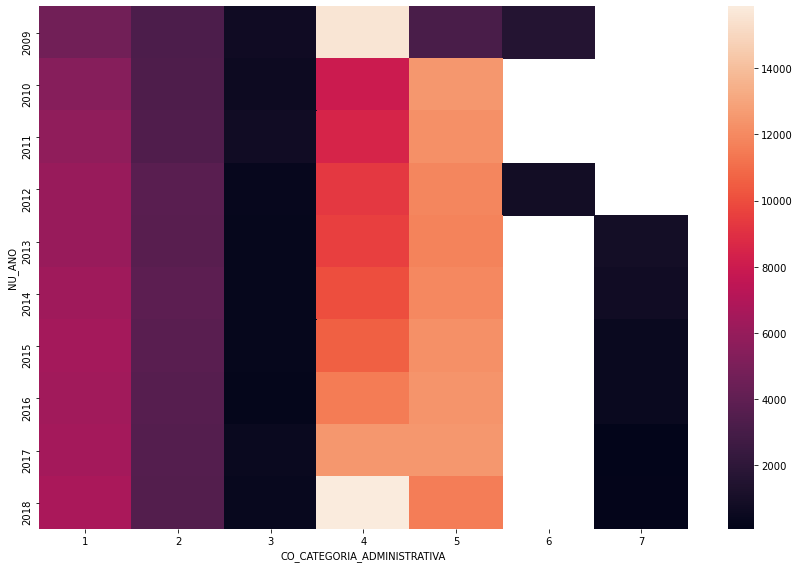

In [250]:

print(cursos['CO_CATEGORIA_ADMINISTRATIVA'].isna().sum())

# There is 0 'nan' values in CO_CATEGORIA_ADMINITRATIVA

cat_adm = cursos.groupby(['NU_ANO','CO_CATEGORIA_ADMINISTRATIVA'])['CO_CURSO'].nunique().to_frame()
cat_adm.reset_index(level=[0,1], inplace = True)

# Heatplot bellow shows that 6 and 7 categories were only used in some years.

fig = plt.figure(figsize = (12,8))

sns.heatmap(cat_adm.pivot('NU_ANO','CO_CATEGORIA_ADMINISTRATIVA','CO_CURSO'), 
                      cbar=True
                     )

fig.tight_layout()
plt.show

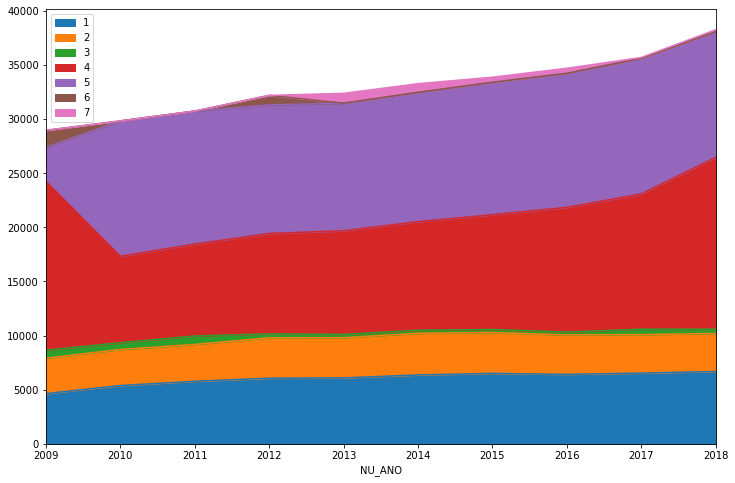

In [251]:
# Area plot bellow shows:

# i) Sharp increase in the number of private courses (values 4:7)
# ii) probably some change in courses category classification in 2010 (from 4 to 5)

fig = cat_adm.pivot('NU_ANO','CO_CATEGORIA_ADMINISTRATIVA','CO_CURSO').plot.area(figsize=(12,8), 
                                                                                xticks=range(2009,2019,1),
                                                                                xlim=(2009,2018),
                                                                                )

fig.legend(loc='upper left')

plt.show()

In [252]:
# Gen new column to differentiate private and public instititutions

cursos['NM_CATEGORIA_ADMINISTRATIVA'] = 'PRIVADA'

cursos.loc[cursos['CO_CATEGORIA_ADMINISTRATIVA'] < 4, ['NM_CATEGORIA_ADMINISTRATIVA']] = 'PUBLICA'

<b>1.1.2. Exploring columns with courses field code and name </b>

- CO_OCDE_AREA_GERAL           
- NO_AREA_GERAL  
- CO_OCDE_AREA_DETALHADA       

In [253]:
# number of CO_OCDE_AREA_GERAL and CO_OCDE_AREA_DETALHADA values

print(cursos['CO_OCDE_AREA_GERAL'].isna().sum())
print(cursos['CO_OCDE_AREA_DETALHADA'].isna().sum())

# There area 39335 'nan' values in 'CO_OCDE_AREA_GERAL'

# Check how many iunique values there are in CO_OCDE_AREA_GERAL and CO_OCDE_AREA_DETALHADA for each year

co_AreaGeral = cursos.groupby(['NU_ANO'])['CO_OCDE_AREA_GERAL'].nunique().to_frame()
co_AreaGeral.reset_index(level=[0], inplace = True)
print(co_AreaGeral)

co_AreaDetalhada = cursos.groupby(['NU_ANO'])['CO_OCDE_AREA_DETALHADA'].nunique().to_frame()
co_AreaDetalhada.reset_index(level=[0], inplace = True)
print(co_AreaDetalhada)

nm_AreaGeral = cursos.groupby(['NU_ANO'])['NO_AREA_GERAL'].nunique().to_frame()
nm_AreaGeral.reset_index(level=[0], inplace = True)
print(nm_AreaGeral)

# Due to the high number of unique values for CO_OCDE_AREA_DETAlHADA, only CO_OCDE_AREA will be used for further analysis

39335
39433
   NU_ANO  CO_OCDE_AREA_GERAL
0    2009                   8
1    2010                   9
2    2011                   8
3    2012                   8
4    2013                   8
5    2014                   8
6    2015                   8
7    2016                   8
8    2017                   8
9    2018                   0
   NU_ANO  CO_OCDE_AREA_DETALHADA
0    2009                      85
1    2010                      78
2    2011                      79
3    2012                      79
4    2013                      79
5    2014                      78
6    2015                      78
7    2016                      78
8    2017                      77
9    2018                       0
   NU_ANO  NO_AREA_GERAL
0    2009              8
1    2010              0
2    2011              0
3    2012              0
4    2013              0
5    2014              0
6    2015              0
7    2016              0
8    2017              0
9    2018              0


In [254]:
nome_areas = cursos_2009[["CO_OCDE_AREA_GERAL",
                          "NO_AREA_GERAL"]]

nome_areas = nome_areas.drop_duplicates(subset=None, keep='first', inplace=False)

# Adding names to courses id

cursos = pd.merge(cursos.drop(columns=['NO_AREA_GERAL']), nome_areas, on='CO_OCDE_AREA_GERAL', how='left')

In [255]:
cursos[cursos['NU_ANO']==2018]

,NU_ANO,CO_IES,CO_CURSO,CO_CATEGORIA_ADMINISTRATIVA,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_DETALHADA,CO_GRAU_ACADEMICO,CO_MODALIDADE_ENSINO,CO_MUNICIPIO_CURSO,QT_INSCRITOS_ANO,QT_VAGAS,QT_MATRICULA_CURSO,QT_CONCLUINTE_CURSO,QT_INGRESSO_CURSO,DT_INICIO_FUNCIONAMENTO,NM_CATEGORIA_ADMINISTRATIVA,NO_AREA_GERAL
325863,2018,1,1,1,NaN,NaN,1.0,1,5103403.0,3141.0,92.0,445.0,76.0,99.0,05/09/1952,PUBLICA,NaN
325864,2018,1,2,1,NaN,NaN,1.0,1,5103403.0,919.0,120.0,344.0,38.0,120.0,11/10/1968,PUBLICA,NaN
325865,2018,1,3,1,NaN,NaN,1.0,1,5103403.0,637.0,55.0,266.0,34.0,53.0,11/10/1968,PUBLICA,NaN
325866,2018,1,6,1,NaN,NaN,2.0,1,5103403.0,1461.0,100.0,326.0,49.0,98.0,15/09/1970,PUBLICA,NaN
325867,2018,1,7,1,NaN,NaN,1.0,1,5103403.0,1449.0,83.0,253.0,23.0,81.0,09/03/1970,PUBLICA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364114,2018,23459,5001430,2,NaN,NaN,3.0,1,3500105.0,89.0,35.0,34.0,0.0,36.0,NaN,PUBLICA,NaN
364115,2018,23700,1458085,2,NaN,NaN,3.0,1,3515707.0,155.0,40.0,38.0,0.0,41.0,01/08/2018,PUBLICA,NaN
364116,2018,23700,1458087,2,NaN,NaN,3.0,1,3515707.0,163.0,40.0,40.0,0.0,41.0,01/08/2018,PUBLICA,NaN
364117,2018,23705,1465936,2,NaN,NaN,3.0,1,3516408.0,41.0,41.0,33.0,0.0,41.0,NaN,PUBLICA,NaN


<b>1.1.3. Exploring 'CO_GRAU_ACADEMICO' column (course level)</b>

Values dictionary:

- Bachelor Degree: CO_GRAU_ACADEMICO = 1
- Bachelor Degree (Teachers license): CO_GRAU_ACADEMICO = 2
- 2-year courses: CO_GRAU_ACADEMICO = 3
- Grad and post-grade courses: CO_GRAU_ACADEMICO = .

Undergraduation courses have values between 1 and 3. In this study we will focus only on undergrad courses.

3316


<function matplotlib.pyplot.show(*args, **kw)>

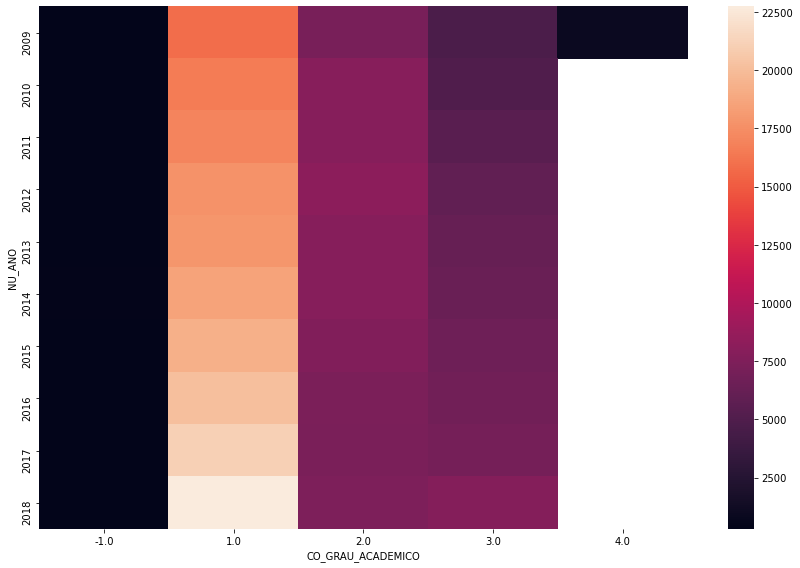

In [256]:
print(cursos['CO_GRAU_ACADEMICO'].isna().sum())

# There are 3316 'nan' values in CO_CATEGORIA_ADMINITRATIVA
# Replacing 'nan' for '-1' in order to check nan distribution across year in a heatmap


grau_acad = cursos.fillna(-1).groupby(['NU_ANO','CO_GRAU_ACADEMICO'])['CO_CURSO'].nunique().to_frame()
grau_acad.reset_index(level=[0,1], inplace = True)

fig = plt.figure(figsize = (12,8))

sns.heatmap(grau_acad.pivot('NU_ANO','CO_GRAU_ACADEMICO','CO_CURSO'), 
                      cbar=True
                     )

fig.tight_layout()
plt.show

In [257]:
# keeping only undergrad courses

cursos = cursos[cursos['CO_GRAU_ACADEMICO']>=0]

<b> 1.1.4. Exploring 'CO_MODALIDADE_ENSINO' column (in-class x on-line courses)</b>

- in-class: CO_MODALIDADE_ENSINO = 1
- on-class: CO_MODALIDADE_ENSINO = 2

In [258]:
print(cursos['CO_MODALIDADE_ENSINO'].isna().sum())

# There are 3316 'nan' values in CO_CATEGORIA_ADMINITRATIVA
# Replacing 'nan' for '-1' in order to check nan distribution across year


mod_ens = cursos.fillna(-1).groupby(['NU_ANO','NM_CATEGORIA_ADMINISTRATIVA','CO_MODALIDADE_ENSINO'])['CO_CURSO'].nunique().to_frame()
mod_ens.reset_index(level=[0,1,2], inplace = True)




0


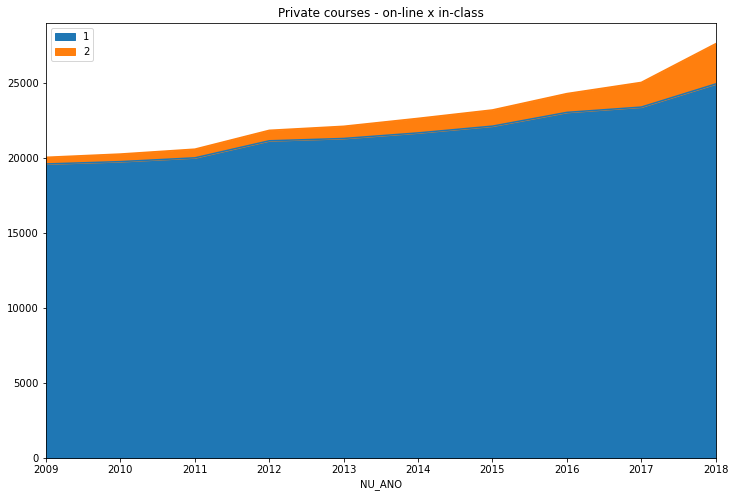

In [259]:
# In the area plot below we can see that the vast majoraty of courses are in-class. 
# After 2014 there is a slight increase in on-line courses in private institutions.

fig = mod_ens[mod_ens['NM_CATEGORIA_ADMINISTRATIVA']=='PRIVADA'].pivot('NU_ANO','CO_MODALIDADE_ENSINO','CO_CURSO').plot.area(figsize=(12,8), 
                                                                                xticks=range(2009,2019,1),
                                                                                xlim=(2009,2018),
                                                                                title='Private courses - on-line x in-class')

fig.legend(loc='upper left')

plt.show()

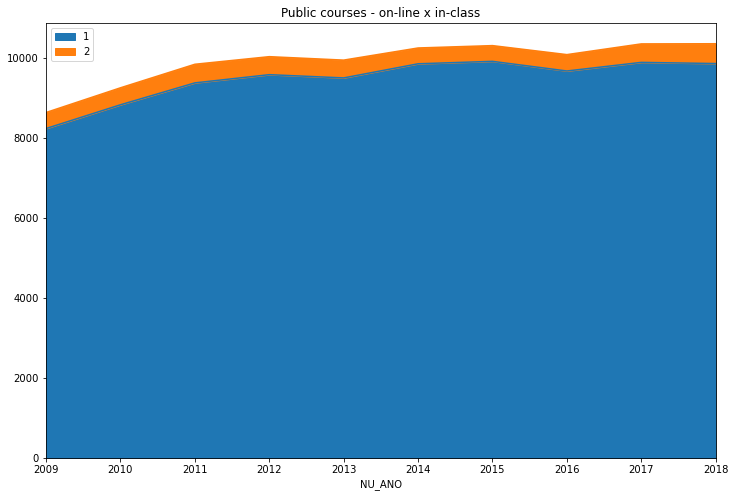

In [260]:
fig = mod_ens[mod_ens['NM_CATEGORIA_ADMINISTRATIVA']=='PUBLICA'].pivot('NU_ANO','CO_MODALIDADE_ENSINO','CO_CURSO').plot.area(figsize=(12,8), 
                                                                                xticks=range(2009,2019,1),
                                                                                xlim=(2009,2018),
                                                                                title='Public courses - on-line x in-class')

fig.legend(loc='upper left')

plt.show()

<b>1.1.5. exploring QT columns. </b>

- QT_INCRITOS_ANO: number of students that applied to the course
- QT_VAGAS: number of seats
- QT_MATRICULA_CURSO: number of enrolled students
- QT_CONCLUINTE_CURSO: number of students in the last semester
- QT_INGRESSO_CURSO: number of students in the first semester (freshman)

In [261]:
qt_columns = []

for c in list(cursos):
    if c[0:2] == 'QT':
        qt_columns.append(c)
    else:
        continue


In [262]:
cursos[cursos['NU_ANO']==2010]['QT_VAGAS']

63172     50.0
63173    350.0
63174      0.0
63175     50.0
63176     35.0
         ...  
93002    200.0
93003    240.0
93004    200.0
93005    140.0
93006     70.0
Name: QT_VAGAS, Length: 29507, dtype: float64

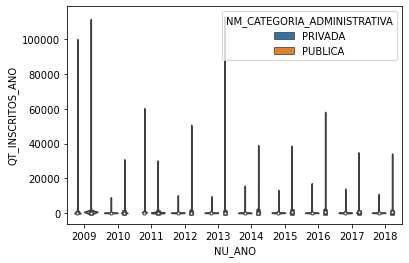

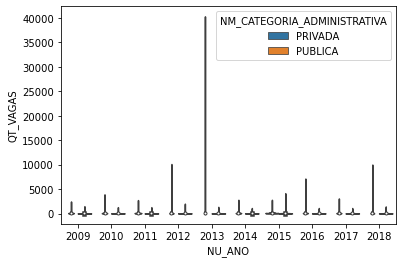

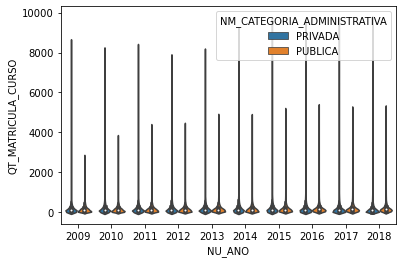

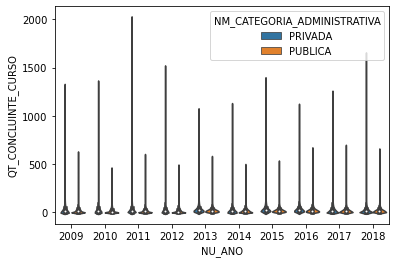

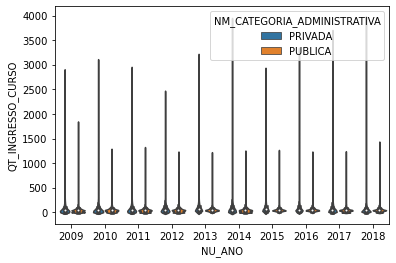

In [263]:
# The ugly graphs bellow brings some informations:
#
# - All QT columns have upper outliers.
# - QT_INCRITOS_ANO and QT_VAGAS have higher variance
# - Variance for Public insitutions is lower


for col in qt_columns:
    sns.violinplot(x='NU_ANO', y=col, 
                   data=cursos[cursos['CO_MODALIDADE_ENSINO']==1], 
                   hue='NM_CATEGORIA_ADMINISTRATIVA',
                   showfliers = False)
    plt.show()



<b> 1.1.6. Exploring 'DT_INICIO_FUNCIONAMENTO' column (inauguration date)</b>

In [264]:
print(cursos[cursos['NU_ANO']==2018]['DT_INICIO_FUNCIONAMENTO'].isna().sum())

# 2588 nan values for 'DT_INICIO_FUNCIONAMENTO' in 2018
cursos['ANO_INICIO'] = cursos['DT_INICIO_FUNCIONAMENTO'].str[-4:]

#there is an outliner 'ANO_INICIO'==2917

cursos = cursos[cursos['ANO_INICIO']!='2917']
cursos = cursos[cursos['ANO_INICIO']!='']

cursos['ANO_INICIO'] = cursos['ANO_INICIO'].astype(float)

print(cursos['ANO_INICIO'].unique())

cursos.head()

2539
[  nan 1952. 1968. 1970. 1971. 1974. 1978. 1975. 1976. 1981. 1986. 1977.
 1988. 1991. 1992. 1994. 1987. 1999. 1990. 2001. 2002. 2003. 2005. 2006.
 2008. 2007. 2009. 2010. 2000. 2011. 2012. 2013. 2014. 2015. 2017. 2018.
 1962. 1972. 1985. 1969. 1979. 1966. 1989. 1993. 1995. 1997. 1963. 1980.
 1967. 1998. 1951. 1950. 1961. 1910. 1945. 1958. 1965. 1964. 1973. 2004.
 1931. 1984. 1996. 1982. 2016. 1891. 1875. 1957. 1839. 1928. 1954. 1953.
 1943. 1946. 1960. 1959. 1956. 1983. 1955. 1942. 1940. 1947. 1934. 1938.
 1949. 1944. 1828. 1924. 1901. 1948. 1902. 1913. 1899. 1911. 1894. 1923.
 1941. 1932. 1933. 1929. 1936. 1939. 1919. 1914. 1904. 1937. 1912. 1926.
 1915. 1930. 1893. 1907. 1925. 1916. 1897. 1832. 1808. 1879. 1877. 1895.
 1920. 1903. 1896. 1889. 1898. 1900. 1918. 1820. 1816. 1927. 1811. 1856.
 1847. 1908. 1888. 1890.]


,NU_ANO,CO_IES,CO_CURSO,CO_CATEGORIA_ADMINISTRATIVA,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_DETALHADA,CO_GRAU_ACADEMICO,CO_MODALIDADE_ENSINO,CO_MUNICIPIO_CURSO,QT_INSCRITOS_ANO,QT_VAGAS,QT_MATRICULA_CURSO,QT_CONCLUINTE_CURSO,QT_INGRESSO_CURSO,DT_INICIO_FUNCIONAMENTO,NM_CATEGORIA_ADMINISTRATIVA,NO_AREA_GERAL,ANO_INICIO
0,2009,514,10394,4,7.0,723.0,1.0,1,3300407.0,53.0,130.0,190.0,36.0,56.0,NaN,PRIVADA,Saúde e bem estar social,NaN
1,2009,208,5615,5,3.0,380.0,1.0,1,3543402.0,741.0,300.0,800.0,125.0,208.0,NaN,PRIVADA,"Ciências sociais, negócios e direito",NaN
2,2009,208,5618,5,1.0,145.0,2.0,1,3543402.0,0.0,0.0,16.0,12.0,4.0,NaN,PRIVADA,Educação,NaN
3,2009,4962,18064,4,1.0,145.0,2.0,1,3167202.0,0.0,0.0,35.0,17.0,0.0,NaN,PRIVADA,Educação,NaN
4,2009,208,5625,5,5.0,524.0,1.0,1,3543402.0,334.0,110.0,319.0,23.0,100.0,NaN,PRIVADA,"Engenharia, produção e construção",NaN


C:\Users\Thiago\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Thiago\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+01, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00, 8.000e+00, 8.000e+00, 8.000e+00, 2.000e+00,
        2.500e+01, 1.500e+01, 6.000e+00, 1.000e+01, 7.000e+00, 7.300e+01,
        5.900e+01, 1.390e+02, 1.020e+02, 1.150e+02, 1.700e+02, 1.830e+02,
        2.200e+02, 2.830e+02, 6.130e+02, 7.170e+02, 5.200e+02, 1.860e+02,
        4.290e+02, 6.010e+02, 8.450e+02, 3.449e+03, 4.792e+03, 7.231e+03,
        6.234e+03, 8.331e+03]),
 array([1808. , 1812.2, 1816.4, 1820.6, 1824.8, 1829. , 1833.2, 1837.4,
        1841.6, 1845.8, 1850. , 1854.2, 1858.4, 1862.6, 1866.8, 1871. ,
        1875.2, 1879.4, 1883.6, 1887.8, 1892. , 1896.2, 1900.4, 1904.6,
        1908.8, 1913. , 1917.2, 1921.4, 1925.6, 1929.8, 1934. , 1938.2,
        1942.4, 1946.6, 1950.8, 1955. , 1959.2, 1963.4, 1967.6, 1971.8,
        1976. , 

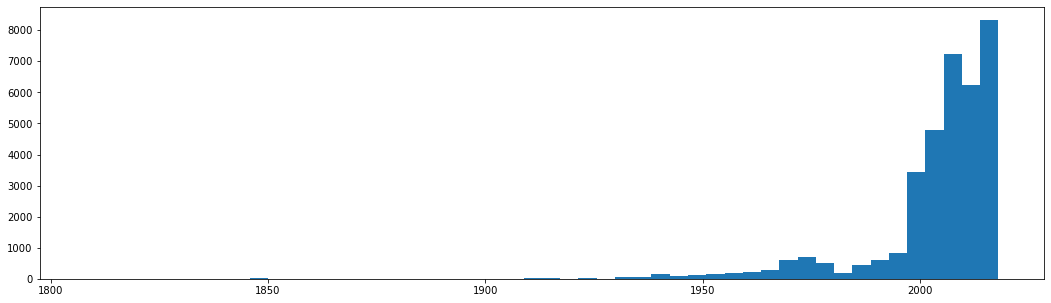

In [265]:
# We can see that most courses active in 2018 were oppened only after 2000

fig = plt.figure(figsize=(18,5))
plt.hist('ANO_INICIO', bins=50, data=cursos[cursos['NU_ANO']==2018])

<b>1.1.6 Saving 'cleaned' courses dataframe</b>

In [266]:
cursos.to_csv('data/cursos.csv')
cursos.groupby(['NU_ANO','NO_AREA_GERAL'])['CO_CURSO'].count()

NU_ANO  NO_AREA_GERAL                       
2009    Agricultura e veterinária                 873
        Ciências sociais, negócios e direito    27179
        Ciências, matemática e computação        5361
        Educação                                15783
        Engenharia, produção e construção        3352
                                                ...  
2017    Educação                                 7291
        Engenharia, produção e construção        5670
        Humanidades e artes                      1610
        Saúde e bem estar social                 4696
        Serviços                                 1170
Name: CO_CURSO, Length: 72, dtype: int64

## 1.2. Institutions dataframes

<i>Important: This code needs to be update for better organzation and further exploration of the data. </i>

<b> 1.2.1. Standardization of columns across years </b>

In [33]:
# Not using 2009 Database because there is no budget info for this year

for i in range(2010,2017,1):
    globals()["ies_" + str(i)] = globals()["ies_" + str(i)][[ 
                     'CO_IES', 
                     'NO_IES',
                     'CO_MANTENEDORA',
                     'NO_MANTENEDORA',
                     'CO_CATEGORIA_ADMINISTRATIVA',
                     'CO_ORGANIZACAO_ACADEMICA',
                     'CO_MUNICIPIO_IES',
                     'CO_UF_IES',
                     'VL_RECEITA_PROPRIA',
                     'VL_TRANSFERENCIA',
                     'VL_OUTRA_RECEITA',
                     'VL_DES_PESSOAL_REM_DOCENTE',
                     'VL_DES_PESSOAL_REM_TECNICO',
                     'VL_DES_PESSOAL_ENCARGO',
                     'VL_DES_CUSTEIO',
                     'VL_DES_INVESTIMENTO',
                     'VL_DES_PESQUISA',
                     'VL_DES_OUTRAS']]
    
    globals()["ies_" + str(i)]['NU_ANO'] = i

    
for i in range(2010,2019,1):
    globals()["ies_" + str(i)] = globals()["ies_" + str(i)].rename(columns={
        'TP_CATEGORIA_ADMINISTRATIVA' : 'CO_CATEGORIA_ADMINISTRATIVA',                                             
        'TP_ORGANIZACAO_ACADEMICA' : 'CO_ORGANIZACAO_ACADEMICA',                                                
        'CO_UF' : 'CO_UF_IES',                                             
        'CO_MUNICIPIO' : 'CO_MUNICIPIO_IES',                                              
        'VL_RECEITA_TRANSFERENCIA' : 'VL_TRANSFERENCIA',                                             
        'VL_RECEITA_OUTRA' : 'VL_OUTRA_RECEITA',                                              
        'VL_DESPESA_PESSOAL_DOCENTE' : 'VL_DES_PESSOAL_REM_DOCENTE',                                                
        'VL_DESPESA_PESSOAL_TECNICO' : 'VL_DES_PESSOAL_REM_TECNICO',                                                
        'VL_DESPESA_PESSOAL_ENCARGO' : 'VL_DES_PESSOAL_ENCARGO',                                               
        'VL_DESPESA_CUSTEIO' : 'VL_DES_CUSTEIO',                                                
        'VL_DESPESA_INVESTIMENTO' : 'VL_DES_INVESTIMENTO',                                              
        'VL_DESPESA_PESQUISA' : 'VL_DES_PESQUISA',                                                
        'VL_DESPESA_OUTRA': 'VL_DES_OUTRAS'})
    
    globals()["ies_" + str(i)] = globals()["ies_" + str(i)][[ 
                     'CO_IES', 
                     'NO_IES',
                     'CO_MANTENEDORA',
                     'NO_MANTENEDORA',
                     'CO_CATEGORIA_ADMINISTRATIVA',
                     'CO_ORGANIZACAO_ACADEMICA',
                     'CO_MUNICIPIO_IES',
                     'CO_UF_IES',
                     'VL_RECEITA_PROPRIA',
                     'VL_TRANSFERENCIA',
                     'VL_OUTRA_RECEITA',
                     'VL_DES_PESSOAL_REM_DOCENTE',
                     'VL_DES_PESSOAL_REM_TECNICO',
                     'VL_DES_PESSOAL_ENCARGO',
                     'VL_DES_CUSTEIO',
                     'VL_DES_INVESTIMENTO',
                     'VL_DES_PESQUISA',
                     'VL_DES_OUTRAS']]
    
    globals()["ies_" + str(i)]['NU_ANO'] = i
                                              

In [34]:
# Appeding all courses ies dataframes in one and save in a csv file

os.chdir("C:/Users/Thiago/Documents/DataScience/Projeto_A")

ies_list=[]

for i in range(2011,2019,1):
    ies_list.append(globals()["ies_" + str(i)])

ies = ies_2010.append(ies_list)

In [35]:
# Create categorical variable for private/public schools

ies['NM_CATEGORIA_ADMINISTRATIVA'] = 'PRIVADA'

ies['NM_CATEGORIA_ADMINISTRATIVA'].loc[(ies['CO_CATEGORIA_ADMINISTRATIVA'] < 4)] = 'PUBLICA'

C:\Users\Thiago\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
vl_columns = ['NM_CATEGORIA_ADMINISTRATIVA']

for c in list(ies):
    if c[0:2] == 'VL':
        vl_columns.append(c)
    else:
        continue
        
vl_columns

['NM_CATEGORIA_ADMINISTRATIVA',
 'VL_RECEITA_PROPRIA',
 'VL_TRANSFERENCIA',
 'VL_OUTRA_RECEITA',
 'VL_DES_PESSOAL_REM_DOCENTE',
 'VL_DES_PESSOAL_REM_TECNICO',
 'VL_DES_PESSOAL_ENCARGO',
 'VL_DES_CUSTEIO',
 'VL_DES_INVESTIMENTO',
 'VL_DES_PESQUISA',
 'VL_DES_OUTRAS']

In [ ]:
ies.to_csv('data/ies.csv')

## 1.3. Students dataframes
<i>Important: This code needs to be update for better organzation and further exploration of the data. </i>

In [37]:
# Read students annual dataframes

for y in range(2009,2019):    
    globals()["alunos_" + str(y)] = pd.read_csv("data/csv_bases/CENSO_SUPERIOR/DM_ALUNO_" + str(y) + ".csv", sep ='|', encoding='latin-1', nrows=0)

['CO_IES',
 'NO_IES',
 'CO_CATEGORIA_ADMINISTRATIVA',
 'DS_CATEGORIA_ADMINISTRATIVA',
 'CO_ORGANIZACAO_ACADEMICA',
 'DS_ORGANIZACAO_ACADEMICA',
 'CO_CURSO',
 'NO_CURSO',
 'CO_CURSO_POLO',
 'CO_TURNO_ALUNO',
 'DS_TURNO_ALUNO',
 'CO_GRAU_ACADEMICO',
 'DS_GRAU_ACADEMICO',
 'CO_MODALIDADE_ENSINO',
 'DS_MODALIDADE_ENSINO',
 'CO_NIVEL_ACADEMICO',
 'DS_NIVEL_ACADEMICO',
 'CO_OCDE',
 'NO_OCDE',
 'CO_OCDE_AREA_GERAL',
 'NO_OCDE_AREA_GERAL',
 'CO_OCDE_AREA_ESPECIFICA',
 'NO_OCDE_AREA_ESPECIFICA',
 'CO_OCDE_AREA_DETALHADA',
 'NO_OCDE_AREA_DETALHADA',
 'CO_ALUNO_CURSO',
 'CO_ALUNO_CURSO_ORIGEM',
 'CO_ALUNO',
 'CO_COR_RACA_ALUNO',
 'DS_COR_RACA_ALUNO',
 'IN_SEXO_ALUNO',
 'DS_SEXO_ALUNO',
 'NU_ANO_ALUNO_NASC',
 'NU_MES_ALUNO_NASC',
 'NU_DIA_ALUNO_NASC',
 'NU_IDADE_ALUNO',
 'CO_NACIONALIDADE_ALUNO',
 'DS_NACIONALIDADE_ALUNO',
 'CO_PAIS_ORIGEM_ALUNO',
 'CO_UF_NASCIMENTO',
 'CO_MUNICIPIO_NASCIMENTO',
 'IN_ALUNO_DEF_TGD_SUPER',
 'IN_DEF_AUDITIVA',
 'IN_DEF_FISICA',
 'IN_DEF_INTELECTUAL',
 'IN_DEF_MULTIP

In [44]:
# Students columns standardization

# 2009

alunos_2009 = pd.read_csv("data/csv_bases/CENSO_SUPERIOR/DM_ALUNO_2009.csv", sep ='|', encoding='latin-1', 
                         usecols=['CO_CATEGORIA_ADMINISTRATIVA',
                                  'CO_CURSO',
                                  'CO_GRAU_ACADEMICO',
                                  'IN_PROUNI_INTEGRAL',
                                  'IN_PROUNI_PARCIAL', 
                                  'IN_FIES', 
                                  'IN_SEXO_ALUNO', 
                                  'CO_COR_RACA_ALUNO', 
                                  'NU_IDADE_ALUNO',
                                  'ANO_INGRESSO'])


alunos_2009 = alunos_2009[alunos_2009['CO_GRAU_ACADEMICO'] == 1]

alunos_2009 = alunos_2009.rename(columns={'IN_FIES':'IN_FIN_REEMB_FIES', 
                                 'IN_PROUNI_INTEGRAL':'IN_FIN_NAOREEMB_PROUNI_INTEGR', 
                                 'IN_PROUNI_PARCIAL': 'IN_FIN_NAOREEMB_PROUNI_PARCIAL',
                                 })


In [47]:
# 2010 - 2013

for i in range(2010,2014,1):
    globals()['alunos_' + str(i)] = pd.read_csv("data/csv_bases/CENSO_SUPERIOR/DM_ALUNO_" + str(i) + ".csv", sep ='|', encoding='latin-1', 
                                                usecols=['CO_CATEGORIA_ADMINISTRATIVA',
                                                         'CO_GRAU_ACADEMICO',
                                                         'CO_CURSO',
                                                         'IN_FIN_NAOREEMB_PROUNI_INTEGR',
                                                         'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 
                                                         'IN_FIN_REEMB_FIES', 
                                                         'IN_SEXO_ALUNO', 
                                                         'CO_COR_RACA_ALUNO', 
                                                         'NU_IDADE_ALUNO',
                                                         'ANO_INGRESSO',
                                                         'TP_PROCEDE_EDUC_PUBLICA'])
    globals()['alunos_' + str(i)] = globals()['alunos_' + str(i)][globals()['alunos_' + str(i)]['CO_GRAU_ACADEMICO'] == 1]
    globals()['alunos_' + str(i)] = globals()['alunos_' + str(i)].rename(columns={'TP_PROCEDE_EDUC_PUBLICA':'CO_TIPO_ESCOLA_ENS_MEDIO'})

In [48]:
# 2014 - 2016

for i in range(2014,2017,1):
    globals()['alunos_' + str(i)] = pd.read_csv("data/csv_bases/CENSO_SUPERIOR/DM_ALUNO_" + str(i) + ".csv", sep ='|', encoding='latin-1', 
                                                usecols=['CO_CATEGORIA_ADMINISTRATIVA',
                                                         'CO_GRAU_ACADEMICO',
                                                         'CO_CURSO',
                                                         'IN_FIN_NAOREEMB_PROUNI_INTEGR',
                                                         'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 
                                                         'IN_FIN_REEMB_FIES', 
                                                         'IN_SEXO_ALUNO', 
                                                         'CO_COR_RACA_ALUNO', 
                                                         'NU_IDADE_ALUNO',
                                                         'ANO_INGRESSO',
                                                         'CO_TIPO_ESCOLA_ENS_MEDIO'])
    globals()['alunos_' + str(i)] = globals()['alunos_' + str(i)][globals()['alunos_' + str(i)]['CO_GRAU_ACADEMICO'] == 1]

In [49]:
# 2017 - 2018
    
for i in range(2017,2019,1):
    globals()['alunos_' + str(i)] = pd.read_csv("data/csv_bases/CENSO_SUPERIOR/DM_ALUNO_" + str(i) + ".csv", sep ='|', encoding='latin-1', 
                                                usecols=['TP_CATEGORIA_ADMINISTRATIVA',
                                                         'CO_CURSO',
                                                         'TP_GRAU_ACADEMICO',
                                                         'IN_FIN_NAOREEMB_PROUNI_INTEGR',
                                                         'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 
                                                         'IN_FIN_REEMB_FIES', 
                                                         'TP_SEXO', 
                                                         'TP_COR_RACA', 
                                                         'NU_IDADE',
                                                         'NU_ANO_INGRESSO',
                                                         'TP_ESCOLA_CONCLUSAO_ENS_MEDIO'])
    globals()['alunos_' + str(i)] = globals()['alunos_' + str(i)][globals()['alunos_' + str(i)]['TP_GRAU_ACADEMICO'] == 1]
    globals()['alunos_' + str(i)] = globals()['alunos_' + str(i)].rename(columns={'IN_FIES':'IN_FIN_REEMB_FIES',
                                                                          'IN_PROUNI_INTEGRAL':'IN_FIN_NAOREEMB_PROUNI_INTEGR', 
                                                                          'IN_PROUNI_PARCIAL': 'IN_FIN_NAOREEMB_PROUNI_PARCIAL',
                                                                          'TP_GRAU_ACADEMICO':'CO_GRAU_ACADEMICO',
                                                                          'TP_ESCOLA_CONCLUSAO_ENS_MEDIO':'CO_TIPO_ESCOLA_ENS_MEDIO',
                                                                          'NU_ANO_INGRESSO':'ANO_INGRESSO',
                                                                          'NU_IDADE':'NU_IDADE_ALUNO',
                                                                          'TP_COR_RACA':'CO_COR_RACA_ALUNO',
                                                                          'TP_SEXO':'IN_SEXO_ALUNO',
                                                                          'TP_CATEGORIA_ADMINISTRATIVA':'CO_CATEGORIA_ADMINISTRATIVA'
                                                                         })

In [17]:
# Saving 'alunos_year' in separate csv files

for i in range(2009,2019,1):
    globals()['alunos_' + str(i)].to_csv('data/alunos_' + str(i) + '.csv')

KeyError: 'alunos_2009'

## 2. IGC
<i>Important: This code needs to be update for better organzation and further exploration of the data. </i>

In [38]:
for i in range(2009,2013,1):
    globals()['igc_' + str(i)] = pd.read_excel('data/csv_bases/IGC/igc_' + str(i) + '.xls', sheet_name=[0,1,2])

for i in range(2013,2017,1):
    globals()['igc_' + str(i)] = pd.read_excel('data/csv_bases/IGC/igc_' + str(i) + '.xlsx', sheet_name=[0,1,2])
    
for i in range(2017,2019,1):
    globals()['igc_' + str(i)] = pd.read_excel('data/csv_bases/IGC/igc_' + str(i) + '.xlsx')

In [39]:
igc_2009 = igc_2009.get(0).append([igc_2009.get(1),igc_2009.get(2)])

igc_2009 = igc_2009[['Ano',
                    'Código da IES',
                    'IES',
                    'Dependência Administrativa' ,
                    'Nº de cursos com CPC nos últimos três anos ',
                    'IGC - Contínuo',
                    'IGC - Faixas']]

igc_2009['Ano'] = 2009

igc_2009 = igc_2009.rename(columns={'Código da IES':'CO_IES',
                                    'IES':'NM_IES',
                                    'Dependência Administrativa':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'Nº de cursos com CPC nos últimos três anos ':'TOTAL_CURSOS_CPC',
                                    'IGC - Contínuo':'IGC_CONTINUO',
                                    'IGC - Faixas':'IGC_FAIXA'})

#2010

igc_2010 = igc_2010.get(0).append([igc_2010.get(1),igc_2010.get(2)])

igc_2010 = igc_2010[['Ano',
                     'Código da IES',
                     'IES',
                     'Dependência Administrativa',
                     'Nº de cursos com CPC nos últimos três anos ',
                     'IGC - Contínuo',
                     'IGC - Faixas']]

igc_2010['Ano'] = 2010

igc_2010 = igc_2010.rename(columns={'Código da IES':'CO_IES',
                                    'IES':'NM_IES',
                                    'Dependência Administrativa':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'Nº de cursos com CPC nos últimos três anos ':'TOTAL_CURSOS_CPC',
                                    'IGC - Contínuo':'IGC_CONTINUO',
                                    'IGC - Faixas':'IGC_FAIXA'})

#2011

igc_2011 = igc_2011.get(0).append([igc_2011.get(1),igc_2011.get(2)])

igc_2011 = igc_2011[['Código_da_IES',
                     'IES',
                     'Categoria_Administrativa',
                     'Número_Cursos_CPC_três_anos',
                     'IGC_contínuo',
                     'IGC_Faixa']]

igc_2011['Ano'] = 2011


igc_2011 = igc_2011.rename(columns={'Código_da_IES':'CO_IES',
                                    'IES':'NM_IES',
                                    'Categoria_Administrativa':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'Número_Cursos_CPC_três_anos':'TOTAL_CURSOS_CPC',
                                    'IGC_contínuo':'IGC_CONTINUO',
                                    'IGC_Faixa':'IGC_FAIXA'})

#2012
igc_2012 = igc_2012.get(0).append([igc_2012.get(1),igc_2012.get(2)])

igc_2012 = igc_2012[['Ano',
                     'Código da IES',
                     'Nome da IES',
                     'Categoria Administrativa',
                     'Número de Cursos com CPC no triênio',
                     'IGC (Contínuo)',
                     'IGC (faixa)']]

igc_2012['Ano'] = 2012

igc_2012 = igc_2012.rename(columns={'Código da IES':'CO_IES',
                                    'Nome da IES':'NM_IES',
                                    'Categoria Administrativa':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'Número de Cursos com CPC no triênio':'TOTAL_CURSOS_CPC',
                                    'IGC (Contínuo)':'IGC_CONTINUO',
                                    'IGC (faixa)':'IGC_FAIXA'})

#2013

igc_2013 = igc_2013.get(0).append([igc_2013.get(1),igc_2013.get(2)])

igc_2013 = igc_2013[['Ano',
                     'Cód.IES',
                     'Nome da IES',
                     'Categ. Administrativa',
                     'Nr. de Cursos com CPC no Triênio',
                     'IGC (Contínuo)',
                     'IGC (faixa)']]

igc_2013['Ano'] = 2013

igc_2013 = igc_2013.rename(columns={'Cód.IES':'CO_IES',
                                    'Nome da IES':'NM_IES',
                                    'Categ. Administrativa':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'Nr. de Cursos com CPC no Triênio':'TOTAL_CURSOS_CPC',
                                    'IGC (Contínuo)':'IGC_CONTINUO',
                                    'IGC (faixa)':'IGC_FAIXA'})

#2014

igc_2014 = igc_2014.get(0).append([igc_2014.get(1),igc_2014.get(2)])

igc_2014 = igc_2014[['Ano',
                     'Cód.IES',
                     'Nome da IES',
                     'Categ. Administrativa',
                     'Nr. de Cursos com CPC no Triênio',
                     'IGC (Contínuo)',
                     'IGC (faixa)']]

igc_2014['Ano'] = 2014

igc_2014 = igc_2014.rename(columns={'Cód.IES':'CO_IES',
                                    'Nome da IES':'NM_IES',
                                    'Categ. Administrativa':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'Nr. de Cursos com CPC no Triênio':'TOTAL_CURSOS_CPC',
                                    'IGC (Contínuo)':'IGC_CONTINUO',
                                    'IGC (faixa)':'IGC_FAIXA'})

#2015

igc_2015 = igc_2015.get(0).append([igc_2015.get(1),igc_2015.get(2)])

igc_2015 = igc_2015[['Cód.IES',
                     'Nome da IES',
                     'Categ. Administrativa',
                     'Nr. de Cursos com CPC no Triênio',
                     'IGC (Contínuo)',
                     'IGC (faixa)']]
igc_2015['Ano'] = 2015

igc_2015 = igc_2015.rename(columns={'Cód.IES':'CO_IES',
                                    'Nome da IES':'NM_IES',
                                    'Categ. Administrativa':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'Nr. de Cursos com CPC no Triênio':'TOTAL_CURSOS_CPC',
                                    'IGC (Contínuo)':'IGC_CONTINUO',
                                    'IGC (faixa)':'IGC_FAIXA'})

#2016

igc_2016 = igc_2016.get(0).append([igc_2016.get(1),igc_2016.get(2)])

igc_2016 = igc_2016[['co_ies',
                     'no_ies',
                     'no_categad',
                     'n_cursos_cpc',
                     'igc',
                     'fx_igc']] 
igc_2016['Ano'] = 2016

igc_2016 = igc_2016.rename(columns={'co_ies':'CO_IES',
                                    'no_ies':'NM_IES',
                                    'no_categad':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'n_cursos_cpc':'TOTAL_CURSOS_CPC',
                                    'igc':'IGC_CONTINUO',
                                    'fx_igc':'IGC_FAIXA'})

#2017

igc_2017 = igc_2017[['Código da IES',
                     'Nome da IES',
                     'Categ. Administrativa',
                     'Nº de Cursos com CPC no Triênio',
                     'IGC (Contínuo)',
                     'IGC (Faixa)']]

igc_2017['Ano'] = 2017

igc_2017 = igc_2017.rename(columns={'Código da IES':'CO_IES',
                                    'Nome da IES':'NM_IES',
                                    'Categ. Administrativa':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'Nº de Cursos com CPC no Triênio':'TOTAL_CURSOS_CPC',
                                    'IGC (Contínuo)':'IGC_CONTINUO',
                                    'IGC (Faixa)':'IGC_FAIXA'})

#2018


igc_2018 = igc_2018[['Ano',
                     'Código da IES',
                     'Nome da IES',
                     'Categoria Administrativa',
                     'Nº de Cursos com CPC no triênio',
                     'IGC (Contínuo)',
                     'IGC (Faixa)']]

igc_2018['Ano'] = 2018

igc_2018 = igc_2018.rename(columns={'Código da IES':'CO_IES',
                                    'Nome da IES':'NM_IES',
                                    'Categoria Administrativa':'NM_CATEGORIA_ADMINISTRATIVA',
                                    'Nº de Cursos com CPC no triênio':'TOTAL_CURSOS_CPC',
                                    'IGC (Contínuo)':'IGC_CONTINUO',
                                    'IGC (Faixa)':'IGC_FAIXA'})

In [40]:
igc_list=[]

for i in range(2010,2019,1):
    igc_list.append(globals()["igc_" + str(i)])

igc = igc_2009.append(igc_list)

In [42]:
# Padronizar valores da coluna 'IGC_FAIXA'

igc['IGC_FAIXA'] = igc['IGC_FAIXA'].astype(str)

igc[igc['IGC_FAIXA']=='SC'] = ''
igc[igc['IGC_FAIXA']=='IES com CPC de cursos não reconhecidos até 30/09/2012'] = ''
igc[igc['IGC_FAIXA']=='Descredenciada'] = ''
igc[igc['IGC_FAIXA']=='nan'] = ''
igc[igc['IGC_FAIXA']=='Sob investigação'] = ''
igc[igc['IGC_FAIXA']=='Sob Supervisão'] = ''
igc[igc['IGC_FAIXA']=='sub judice'] = ''
igc[igc['IGC_FAIXA']=='Ato vencido'] = ''
igc[igc['IGC_FAIXA']=='3 (sub judice)'] = ''
igc[igc['IGC_FAIXA']=='-'] = ''
igc[igc['IGC_FAIXA']=='Sub judice'] = ''
igc[igc['IGC_FAIXA']=='3.0'] = '3'
igc[igc['IGC_FAIXA']=='4.0'] = '4'
igc[igc['IGC_FAIXA']=='2.0'] = '2'

igc = igc[igc['IGC_FAIXA'] != '']

igc['IGC_FAIXA'] = igc['IGC_FAIXA'].astype(int)

print(igc['IGC_FAIXA'].unique())

[3 4 5 2 1]


In [44]:
igc.to_csv('data/igc.csv')

# 3. CPC
<i>Important: This code needs to be update for better organzation and further exploration of the data. </i>

In [71]:
cpc_2009 = pd.read_excel('data/csv_bases/CPC/cpc_2009.xls')
cpc_2018 = pd.read_excel('data/csv_bases/CPC/cpc_2018.xlsx')

In [72]:
cpc_2009 = cpc_2009[['Código da IES',
                     'IES',
                     'Dep. Administrativa', 
                     'Código da Área',
                     'Área',
                     'Código do Município',
                     'Município',
                     'Número de Participantes Ingressantes',
                     'Número de Participantes Concluintes',
                     'Nota Enade Concluintes = Conceito Enade contínuo',
                     'CPC contínuo',
                     'CPC faixa'
                    ]]



cpc_2009 = cpc_2009.rename(columns={'IES':'Nome da IES',
                                   'Dep. Administrativa':'Categoria Administrativa', 
                                   'Área':'Área de Avaliação',
                                   'Município':'Município do Curso',
                                   'Número de Participantes Ingressantes':'Nº de Concluintes Inscritos',
                                   'Número de Participantes Concluintes':'Nº de Concluintes Participantes',
                                   'Nota Enade Concluintes = Conceito Enade contínuo':'Conceito Enade (Contínuo)',
                                   'CPC contínuo':'CPC (Contínuo)',
                                   'CPC faixa':'CPC (Faixa)'})

cpc_2009['Ano'] = 2009

In [73]:
cpc_2018 = cpc_2018[['Código da IES',
                     'Nome da IES',
                     'Categoria Administrativa', 
                     'Código da Área',
                     'Área de Avaliação',
                     'Código do Município',
                     'Município do Curso',
                     'Nº de Concluintes Inscritos',
                     'Nº de Concluintes Participantes',
                     'Conceito Enade (Contínuo)',
                     'CPC (Contínuo)',
                     'CPC (Faixa)'
                    ]]

cpc_2018['Ano'] = 2018

In [74]:
cpc = cpc_2009.append(cpc_2018)

In [75]:
cpc[cpc['CPC (Faixa)']=='SC']='0'
cpc['CPC (Faixa)'] = cpc['CPC (Faixa)'].astype(int)

cpc = cpc[cpc['CPC (Faixa)']>0]

In [76]:
cpc.to_csv('data/cpc.csv')